Using BFS and DFS algorithm to solve Maze problem

In [1]:
from collections import deque
import matplotlib.pyplot as plt
import numpy as np

class Maze:
    def __init__(self, maze, start_position, goal_position):
        # Initialize Maze object with the provided maze, start_position, and goal position
        self.maze = maze
        self.maze_height = maze.shape[0] # Get the height of the maze (number of rows)
        self.maze_width = maze.shape[1]  # Get the width of the maze (number of columns)
        self.start_position = start_position    # Set the start position in the maze as a tuple (x, y)
        self.goal_position = goal_position      # Set the goal position in the maze as a tuple (x, y)

    def show_maze(self):
        # Visualize the maze using Matplotlib
        plt.figure(figsize=(5,5))

        # Display the maze as an image in grayscale ('gray' colormap)
        plt.imshow(self.maze, cmap='gray')

        # Add start and goal positions as 'S' and 'G'
        plt.text(self.start_position[1], self.start_position[0], 'S', ha='center', va='center', color='red', fontsize=20)
        plt.text(self.goal_position[1], self.goal_position[0], 'G', ha='center', va='center', color='green', fontsize=20)

        # Remove ticks and labels from the axes
        plt.xticks([]), plt.yticks([])

        # Show the plot
        plt.show()

    def plot_path(self, path, visited_nodes):
        # Visualize the maze with the path and visited nodes using Matplotlib
        plt.figure(figsize=(5,5))

        # Display the maze as an image in grayscale ('gray' colormap)
        plt.imshow(self.maze, cmap='gray')

        # Add start and goal positions as 'S' and 'G'
        plt.text(self.start_position[1], self.start_position[0], 'S', ha='center', va='center', color='red', fontsize=20)
        plt.text(self.goal_position[1], self.goal_position[0], 'G', ha='center', va='center', color='green', fontsize=20)

        # Highlight the path with a red line
        path_x = [pos[1] for pos in path]
        path_y = [pos[0] for pos in path]
        plt.plot(path_x, path_y, color='red', linewidth=2)

        # Mark the visited nodes with blue dots
        visited_x = [pos[1] for pos in visited_nodes]
        visited_y = [pos[0] for pos in visited_nodes]
        plt.scatter(visited_x, visited_y, color='blue', marker='o')

        # Remove ticks and labels from the axes
        plt.xticks([]), plt.yticks([])

        # Show the plot
        plt.show()

In [2]:
maze_layout = np.array([
    [0, 1, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 1, 1],
    [0, 0, 0, 0, 0]
])

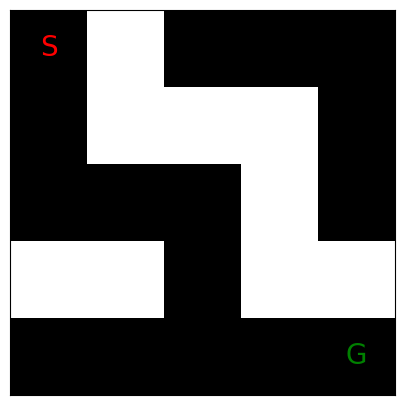

In [3]:
# Create an instance of the maze and set the starting and ending positions
maze = Maze(maze_layout, (0, 0), (4, 4))
# Visualize the maze
maze.show_maze()


In [4]:
class DFS:
    def __init__(self, maze):
        self.maze = maze
        self.visited = set()
        self.stack = deque([(maze.start_position,[])])
    def find_path(self):
        while self.stack:
            position , path = self.stack.pop()
            row, col = position
            if position ==  self.maze.goal_position:
                return path + [position]
            if(
                0 <= row < self.maze.maze_height 
                and 0 <= col <= self.maze.maze_width 
                and self.maze.maze[row][col] == 0 
                and position not in self.visited
            ):
                self.visited.add(position)
                # print(position)
                # print(path)
                # print(path + [position])
                # print(self.stack)
                self.stack.append([position, path + [position]])
                self.stack.append([(row - 1, col), path + [position]])
                self.stack.append([(row + 1, col), path + [position]])
                self.stack.append([(row, col - 1), path + [position]])
                self.stack.append([(row, col + 1), path + [position]])


In [5]:
class BFS:
    def __init__(self, maze):
        self.maze = maze
        self.visited = set()
        self.stack = deque([(maze.start_position,[])])
    def find_path(self):
        while self.stack:
            position , path = self.stack.popleft()
            row, col = position
            if position ==  self.maze.goal_position:
                return path + [position]
            if(
                0 <= row < self.maze.maze_height 
                and 0 <= col <= self.maze.maze_width 
                and self.maze.maze[row][col] == 0 
                and position not in self.visited
            ):
                self.visited.add(position)
                self.stack.append([position, path + [position]])
                self.stack.append([(row - 1, col), path + [position]])
                self.stack.append([(row + 1, col), path + [position]])
                self.stack.append([(row, col - 1), path + [position]])
                self.stack.append([(row, col + 1), path + [position]])


DFS path [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4)]


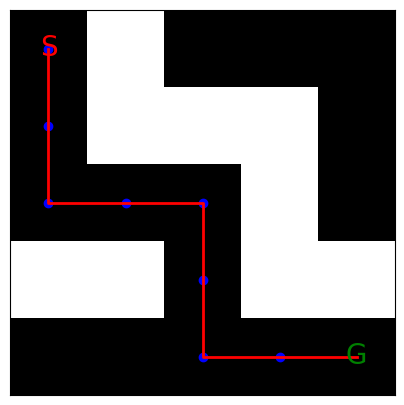

In [6]:
dfs = DFS(maze)
dfs_path = dfs.find_path()
if dfs_path is not None:
    print("DFS path",dfs_path)
    visited_nodes = dfs.visited
    maze.plot_path(dfs_path, visited_nodes)
else:
    print("No path found by using DFS")


DFS path [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4)]


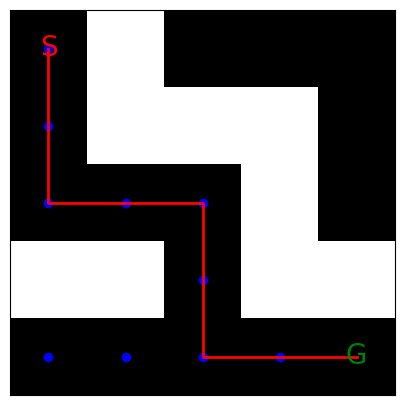

In [7]:
bfs = BFS(maze)
bfs_path = bfs.find_path()
if bfs_path is not None:
    print("DFS path",bfs_path)
    visited_nodes = bfs.visited
    maze.plot_path(bfs_path, visited_nodes)
else:
    print("No path found by using BFS")
